In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
inter_data_dir = '../data/02_intermediate/'
gff_prokka = 'updated_gff_prokka.csv'
rest_prokka_file = 'other_annotations_gff_prokka.csv'
prokka = pd.read_csv(os.path.join(inter_data_dir,gff_prokka),keep_default_na=False)
rest_prokka = pd.read_csv(os.path.join(inter_data_dir,rest_prokka_file),keep_default_na=False)



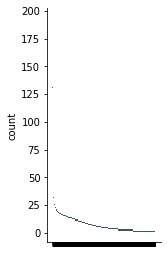

In [27]:
annot_counts = prokka.annot.value_counts().reset_index()
annot_counts.columns = ['annot','count']
len(annot_counts)
ax = sns.displot(data=annot_counts,x='annot',y='count',height=4, aspect=.7)
ax.set(xlabel=None)
ax.set(xticklabels=[])
ax.set(xticks=[])
plt.show()

In [24]:
annot_counts.head()

P69805        193
P08722        130
A0A0H2VDN9    113
P46317         85
P40740         81
Name: annot, dtype: int64

In [68]:
bins = [0,300,4000]
prokka["binned"] = pd.cut(prokka.length,bins)
final_prokka = prokka.binned.value_counts().reset_index() # prokka["counts"] = 
final_prokka.columns = ['binned','counts']

Text(0.5, 1.0, 'Barplot of Protein lengths with a Uniprot Annotation')

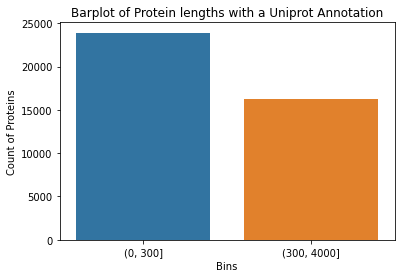

In [69]:
sns.barplot(data = final_prokka,x='binned',y='counts')
plt.xlabel('Bins')
plt.ylabel('Count of Proteins')
plt.title('Barplot of Protein lengths with a Uniprot Annotation')

In [97]:
rest_prokka = rest_prokka[rest_prokka.annot != '']
all_annot = pd.concat([prokka,rest_prokka],axis=0)
annotations = all_annot.annot.str.split(':')[0]

Text(0.5, 1.0, 'Distribution of annotations given by Prokka with AA sequence similarity or motif')

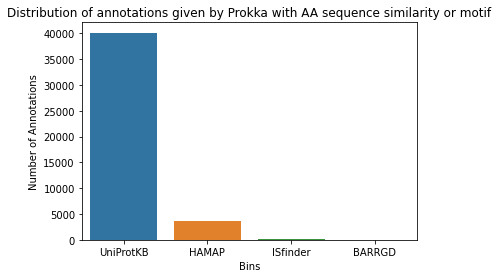

In [106]:
annotation_dist = all_annot.annot.str.split(":").str[0].value_counts().reset_index()
sns.barplot(data = annotation_dist,x='index',y='annot')
plt.xlabel('Bins')
plt.ylabel('Number of Annotations')
plt.title('Distribution of annotations given by Prokka with AA sequence similarity or motif')

<AxesSubplot:ylabel='count'>

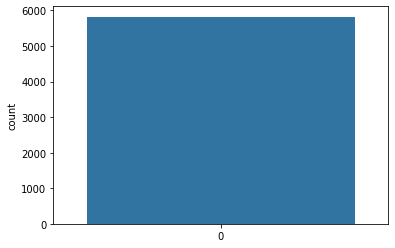

In [17]:
sns.countplot(data=annot_counts)